# SPAM EMAIL DETECTION

NAME:RAMSHA SHAIKH

In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ramsh\OneDrive\Desktop\spamemail.csv" , encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [33]:
df['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5169 non-null   object
 1   v2          5169 non-null   object
 2   Unnamed: 2  43 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  5 non-null      object
dtypes: object(5)
memory usage: 242.3+ KB


In [24]:
df.shape

(5572, 5)

In [26]:
df.columns
df=df.drop_duplicates()

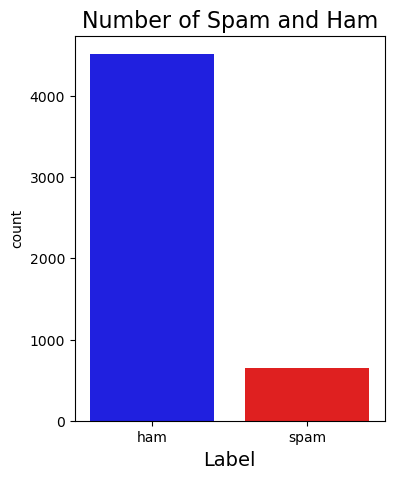

In [35]:
color={"ham": "blue", "spam": "red"}
plt.figure(figsize=(4,5))
sns.countplot(x='v1' , data=df, palette=color)

plt.title('Number of Spam and Ham',fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.grid(False)
plt.show()

# VISUALIZING LENGTH OF MAILS

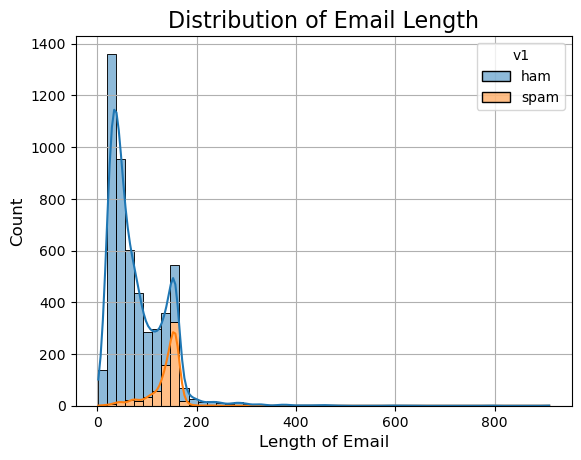

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

df['length'] =df['v2'].apply(len)

sns.histplot(data=df, x='length', hue='v1', multiple='stack', bins=50, kde=True)

plt.title('Distribution of Email Length', fontsize=16)
plt.xlabel('Length of Email', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(True)
plt.show()
      



# Visualizing most common words in spam and ham emails

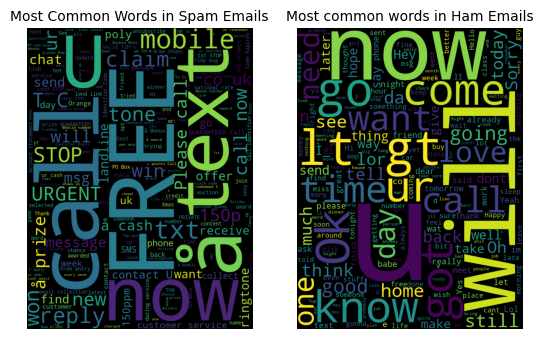

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_text=' '.join(df[df ['v1']=='spam']['v2']) 
ham_text =' '.join(df[df['v1'] == 'ham']['v2'])

spam_wordcloud = WordCloud(width=600, height=800, background_color='black').generate(spam_text) 
ham_wordcloud = WordCloud (width=600, height=800, background_color='black').generate(ham_text)

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud,)
plt.axis('off') 
plt.title('Most Common Words in Spam Emails',fontdict={'fontsize':10})

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud) 
plt.axis('off')
plt.title('Most common words in Ham Emails', fontdict={'fontsize':10})

plt.show()

In [55]:
a=df['v2']
a

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [57]:
b=df['v1']
b

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5169, dtype: object

In [61]:
from sklearn.model_selection import train_test_split

a_train,a_test,b_train,b_test = train_test_split(df['v2'],df['v1'],test_size=0.2, random_state=42)

print(df['v2'].shape)
print(a_train.shape)
print(a_test.shape)

(5169,)
(4135,)
(1034,)


In [60]:
ppl=Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier',MultinomialNB())
])

In [62]:
ppl.fit(a_train,b_train)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [65]:
b_pred=ppl.predict(a_test)

# Analyzing Accuracy

In [66]:
print('Accuracy:',accuracy_score(b_test,b_pred))

Accuracy: 0.9835589941972921


# Assessing precision

In [67]:
print('Precesion:',precision_score(b_test,b_pred,pos_label='spam'))

Precesion: 0.9705882352941176


# Calculating Recall

In [69]:
print('Recall:',recall_score(b_test,b_pred,pos_label="spam"))

Recall: 0.9103448275862069


# Assessing F1-score

In [70]:
print('F1:',f1_score(b_test,b_pred,pos_label="spam"))

F1: 0.9395017793594306


# Visualizing confusion matrix

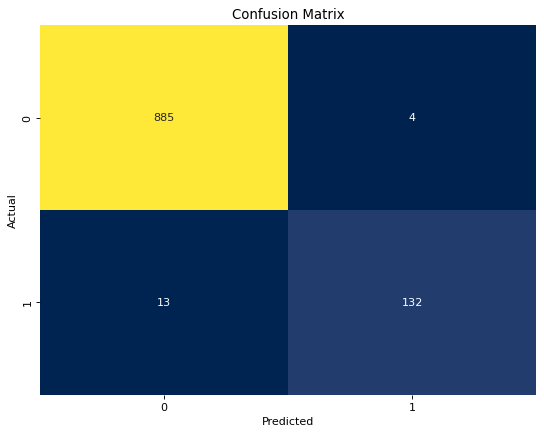

In [73]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

confm = confusion_matrix(b_test, b_pred)
plt.figure(figsize=(8, 6), dpi=80) 
sns.heatmap(confm, annot=True, fmt="d", cmap="cividis", cbar=False) 
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
report=classification_report(b_test,b_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.97      0.91      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



# Test the model

In [80]:
mail1=["Exclusive Offer: Win a Luxury Vacation!"]
mail2=["Please get me a print of the image attached here"]

In [76]:
print(ppl.predict(mail1))

['spam']


In [77]:
print(ppl.predict(mail2))

['ham']


In [ ]:
mail3=["Your job alert for analyst"]

In [82]:
print(ppl.predict(mail3))

['spam']
